# Density Estimator

Density estimation refers to mapping data points to a curve or function that best represents the data

## Kernel Density Estimation (KDE)

### Histogram

- Simplest, non-parametric density estimation is a histogram
- Function that counts the number of observations that fall into each of the disjoint categories (bins)

Problems:
- Not smooth 
- Depends on width and endpoints of each bin


In [24]:
import numpy as np

In [25]:
def generate_data(seed=7):
    rand = np.random.RandomState(seed)
    x = []
    data = rand.lognormal(mean=0, sigma=0.3, size=1000)
    x = np.concatenate((x, data))
    data2 = rand.normal(loc=3, scale=1, size=1000)
    x = np.concatenate((x, data2))

    return x.reshape(-1,1)

In [26]:
X_train = generate_data(seed=10)

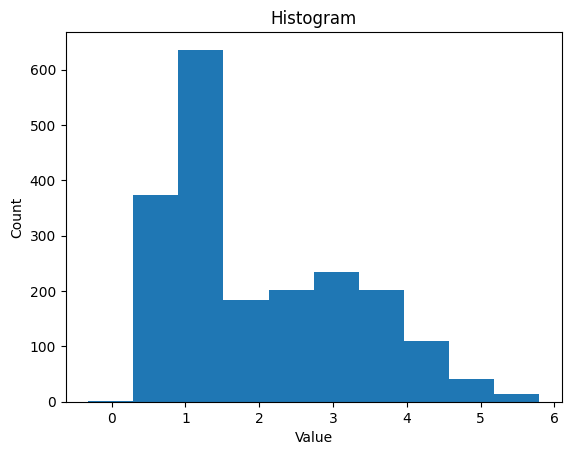

In [27]:
import matplotlib.pyplot as plt

plt.hist(X_train, bins=10)
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Histogram")
plt.show()

### Kernel Density Estimate

- A normal kernel is placed on each data point
- Kernels are summed to make the kernel density estimate
- Kernel density estimate is more smooth as it converges faster to the true underlying density for continuous random variables
  

In [28]:
X_test = np.linspace(start=-1, stop=7, num=2000)

In [29]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity()

In [30]:
kde.fit(X_train)

KernelDensity()

In [31]:
log_dens = kde.score_samples(X_test.reshape(-1,1))

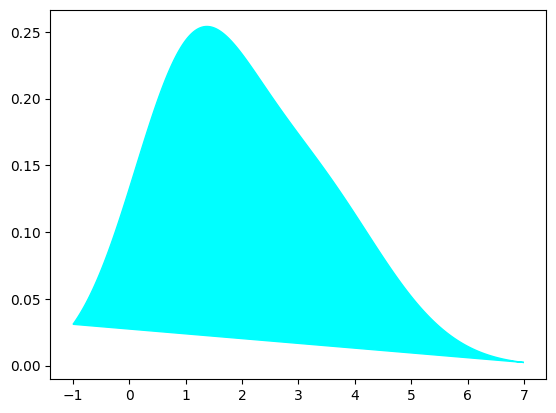

In [32]:
plt.fill(X_test, np.exp(log_dens), c='cyan')
plt.show()

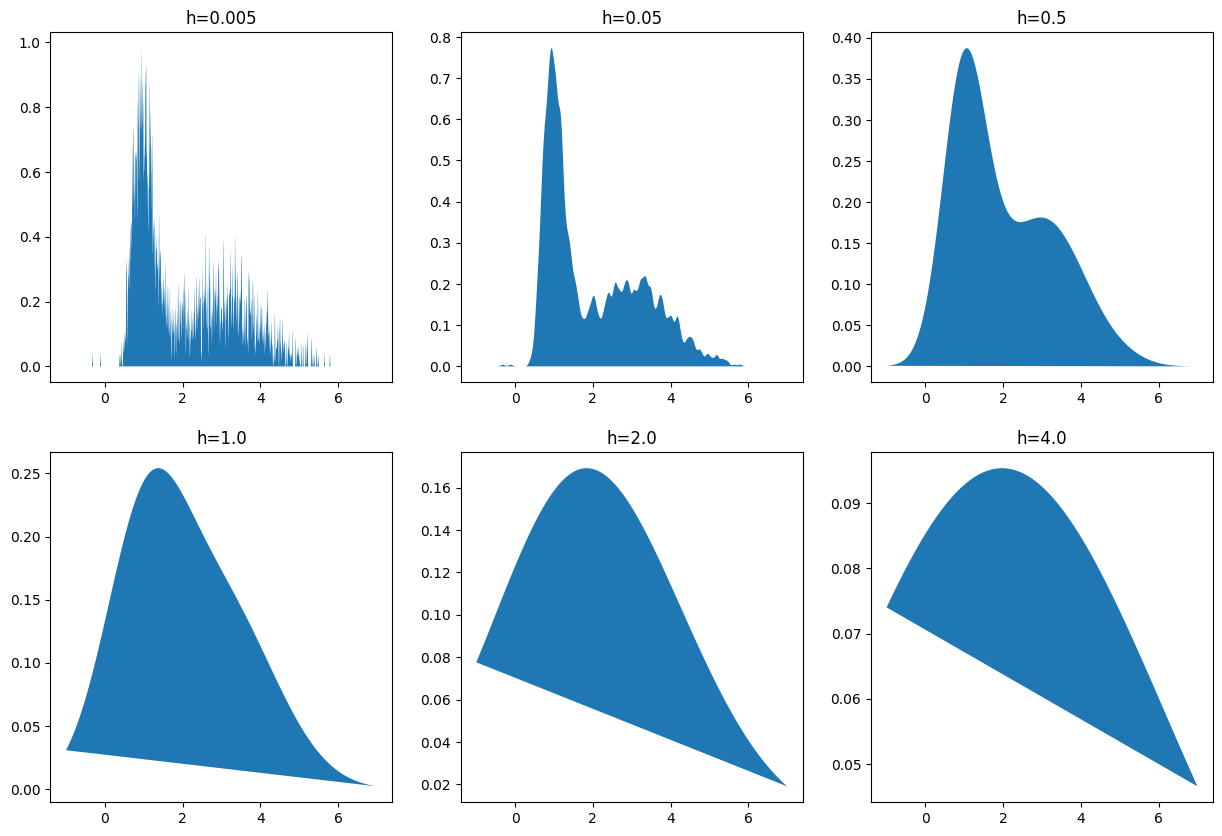

In [33]:
bandwidths = [0.005, 0.05, 0.5, 1.0, 2.0, 4.0]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
plt_ind = np.arange(6) + 231

for b_width, ind in zip(bandwidths, plt_ind):
    kde = KernelDensity(bandwidth=b_width)
    kde.fit(X_train) 
    log_dens = kde.score_samples(X_test.reshape(-1,1))
    plt.subplot(ind)
    plt.fill(X_test, np.exp(log_dens))
    plt.title(f"h={b_width}")


### Tuning Kernel and Bandwidth using GridSearchCV

In [19]:
from sklearn.model_selection import GridSearchCV

def custom_scorer(estimator, X):
    # Using mean instead of sum of likelihood which is the default scoring method
    scores = estimator.score_samples(X)
    scores = scores[(scores != float("-inf")) & (scores != float("inf"))]
    return np.mean(scores)

bandwidth = np.arange(start=0.05, stop=5, step=0.05)
kernel = ["gaussian", "epanechnikov", "exponential", "linear", "tophat", "cosine"]
kde = KernelDensity()
grid = GridSearchCV(estimator=kde, param_grid={"bandwidth": bandwidth, "kernel": kernel}, return_train_score=False, scoring=custom_scorer)

In [20]:
grid.fit(X_train)

c:\Project Directories\Learning\python3.7_learning\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [ -597.07759565           -inf  -593.80135694           -inf
           -inf           -inf  -591.54766052           -inf
  -593.06082515           -inf           -inf           -inf
  -593.10521358           -inf  -596.99043863           -inf
           -inf           -inf  -597.39515235           -inf
  -602.95742753           -inf           -inf           -inf
  -603.2891229   -591.10611795  -609.86053719  -591.21983016
  -592.28499249  -591.10227633  -610.22361925  -591.80199341
  -617.0834221   -591.49802392  -594.88027307  -591.66133004
  -617.78087754  -593.45869285  -624.30022984  -592.59939687
  -598.81784485  -593.13221793  -625.630652    -595.6297047
  -631.35062279  -594.175341    -603.223353    -595.11961469
  -633.49604063  -598.25394865  -638.16763789  -596.1527818
  -607.9328537   -597.5499251   -641.178

GridSearchCV(estimator=KernelDensity(),
             param_grid={'bandwidth': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05, 1.1 ,
       1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 , 1.65,
       1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15, 2.2 ,
       2.25, 2.3 , 2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 , 2.75,
       2.8 , 2.85, 2.9 , 2.95, 3.  , 3.05, 3.1 , 3.15, 3.2 , 3.25, 3.3 ,
       3.35, 3.4 , 3.45, 3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 , 3.85,
       3.9 , 3.95, 4.  , 4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35, 4.4 ,
       4.45, 4.5 , 4.55, 4.6 , 4.65, 4.7 , 4.75, 4.8 , 4.85, 4.9 , 4.95]),
                         'kernel': ['gaussian', 'epanechnikov', 'exponential',
                                    'linear', 'tophat', 'cosine']})

In [21]:
kde = grid.best_estimator_

In [22]:
grid.best_params_

{'bandwidth': 0.25, 'kernel': 'cosine'}

In [23]:
grid.best_score_

-591.1022763276314

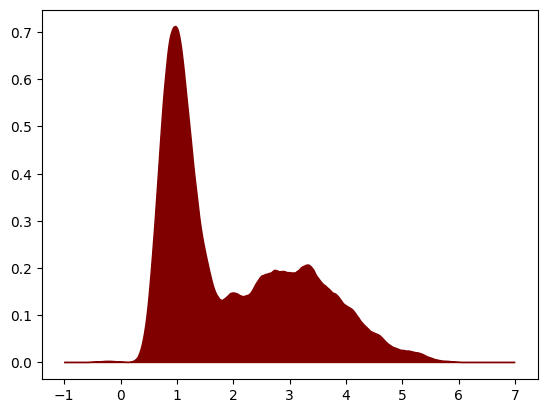

In [16]:
log_dens = kde.score_samples(X_test.reshape(-1,1))

plt.fill(X_test, np.exp(log_dens), c="maroon")
plt.show()

In [17]:
import pandas as pd 

X_test = pd.DataFrame(X_test)
X_train = pd.DataFrame(X_train)

In [18]:
df= X_train.append(X_test).reset_index(drop=True).rename(columns={0:"X"})

In [19]:
df.to_csv("data/sample_data.csv")

In [24]:
~df.iloc[:,0].isna()

0       True
1       True
2       True
3       True
4       True
        ... 
3995    True
3996    True
3997    True
3998    True
3999    True
Name: X, Length: 4000, dtype: bool